In [1]:
%matplotlib inline
# %matplotlib notebook # Does not work 
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from hpbandster.core.result import logged_results_to_HBS_result

In [2]:
def get_runs(file):
    results = pickle.load(open(file, "rb"))
    return results['hpo_results']

In [3]:
dataset = 'bioasq'
workdir = './' + dataset + '_dir/'

In [4]:
bio_bohb_dir = './bioasq_dir/hpo_results_bohb/'
bio_rs_dir = './bioasq_dir/hpo_results_rs/'
rob_bohb_dir = './robust_dir/hpo_results_bohb/'
rob_rs_dir = './robust_dir/hpo_results_rs/'

In [5]:
# bohb_file = './bioasq_dir/bioasq_hpo_results_bohb.pickle'
# rs_file = './bioasq_dir/bioasq_hpo_results_rs.pickle'

In [6]:
bohb_file = './robust_dir/robust_hpo_results_bohb20190925.pickle'
rs_file = './robust_dir/robust_hpo_results_rs20190925.pickle'

In [7]:
# # Intermediate results

# # bohb_results = logged_results_to_HBS_result(bio_bohb_dir)
# # rs_results = logged_results_to_HBS_result(bio_rs_dir)

# bohb_results = logged_results_to_HBS_result(rob_bohb_dir)
# rs_results = logged_results_to_HBS_result(rob_rs_dir)

In [8]:
# Final results

bohb_results = get_runs(bohb_file)
rs_results = get_runs(rs_file)

In [9]:
# 

all_runs_bohb = bohb_results.get_all_runs()
all_runs_rs = rs_results.get_all_runs()

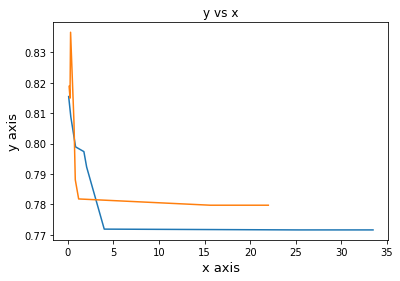

In [10]:
hour = 3600

pp = PdfPages('hpo_test.pdf')
plt.figure()
plt.clf()

plt.title('y vs x')
plt.xlabel('x axis', fontsize = 13)
plt.ylabel('y axis', fontsize = 13)


incumbent_rs = rs_results.get_incumbent_trajectory()
incumbent_bohb = bohb_results.get_incumbent_trajectory()
plt.plot([x/hour for x in incumbent_rs['times_finished']], incumbent_rs['losses'])
plt.plot([x/hour for x in incumbent_bohb['times_finished']], incumbent_bohb['losses'])
pp.savefig()
plt.show()
pp.close()

In [11]:
min(rs_results.get_incumbent_trajectory()['losses'])

0.77162

In [12]:
rs_results.get_incumbent_trajectory()

{'config_ids': [(0, 0, 0),
  (3, 0, 0),
  (11, 0, 0),
  (26, 0, 0),
  (30, 0, 0),
  (57, 0, 0),
  (373, 0, 0),
  (373, 0, 0)],
 'times_finished': [288.3888123035431,
  1132.4896483421326,
  3020.773049354553,
  6304.930422544479,
  7391.84229183197,
  14350.453727960587,
  91182.03313446045,
  120607.22482919693],
 'budgets': [100, 100, 100, 100, 100, 100, 100, 100],
 'losses': [0.81546,
  0.80882,
  0.79892,
  0.7973600000000001,
  0.7923,
  0.77188,
  0.77162,
  0.77162]}

In [13]:
min(bohb_results.get_incumbent_trajectory()['losses'])

0.77974

In [14]:
bohb_results.get_runs_by_id(bohb_results.get_incumbent_id())[0].info

{'s1': {'metric': 0.213,
  'info': {'map': '0.2130', 'P_20': '0.3082', 'ndcg_cut_20': '0.3788'}},
 's2': {'metric': 0.156,
  'info': {'map': '0.1560', 'P_20': '0.2460', 'ndcg_cut_20': '0.3295'}},
 's3': {'metric': 0.2427,
  'info': {'map': '0.2427', 'P_20': '0.3590', 'ndcg_cut_20': '0.4261'}},
 's4': {'metric': 0.2593,
  'info': {'map': '0.2593', 'P_20': '0.3780', 'ndcg_cut_20': '0.4481'}},
 's5': {'metric': 0.2303,
  'info': {'map': '0.2303', 'P_20': '0.3420', 'ndcg_cut_20': '0.4111'}},
 'mean_metric': 0.22026,
 'std_metric': 0.03552614}